In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import json
from collections import defaultdict, Counter

# Introduction

In 2011, URL shortening service bit.ly partnered with the United States gevernment website usa.org to provide a feed of anonymous data gathered from users who shorten links ending with `.gov` or `.mil`. As of this writing, in addition to providing a live feed, hourly snapshots are available as downloadable text files, see the webpage: http://www.usa.gov/About/developer-resources/1usagov.shtml.

# Get Familiar with the Data

In case of the hourly snapshots, each line in each file contains a common form of web data known as **JSON**, which stands for **JavaScript Object Notation**. For example, if we read just the first line of a file you may see something like this:

In [2]:
path = r'E:\Python\Lehrbuecher\Machine Learning\Pandas\Python For Data Analysis\ch02\usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python has numerous built-in and 3rd party modules for converting a JSON string into a Python dictionary object. Here we’ll use the `json` module and its `loads()` function invoked on each line in the sample file we downloaded. The resulting object `records` is now a list of Python dicts:

In [3]:
# Convert each line in the txt file to a dict object

records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

It’s now easy to access individual values within `records` by passing a string for the key we wish to access:

In [4]:
records[0]['tz']

'America/New_York'

There are many ways we could do to obtain the most often-occurring time zones in the data set (the `tz` field): the harder way (using just the Python standard library) and the easier way (using `pandas`).

# Counting Time Zones in Pure Python

First, let’s extract a list of time zones using a list comprehension. Note that not all of the records have a time zone field (keyword), we should check if `tz` is in the record at the end of the list comprehension.

Just looking at the first 10 time zones, we see that some of them are unknown (empty). We can filter these out, but it's better to leave them in for now.

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

One way to produce counts by time zone is to use a dict to store counts while we iterate through the time zones:

In [6]:
# Define a function to do the counting
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

# Use defaultdict function in the collections library to define the counting function
def get_counts2(sequence):
    counts = defaultdict(int)    # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

# Count the time zones
counts = get_counts(time_zones)
print("The count of the 'America/New_York' zone: %d" % counts['America/New_York'])
print("Totle time zones: %d" % len(time_zones))

The count of the 'America/New_York' zone: 1251
Totle time zones: 3440


If we wanted the top 10 time zones and their counts, we have to do a little bit of dictionary acrobatics:

In [7]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

We may also use the collections.Counter class to make this task a lot easier:

In [8]:
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# Counting Time Zones with `pandas`

Using `pandas` to produce counts by time zone, we should create a `DataFrame` from the original set of `records`:

In [9]:
frame = DataFrame(records)
frame['tz'][:10]    # the same as frame.tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

`frame['tz']` is of `pandas.core.series.Series` type which has a method `value_counts()` that gives us what we’re looking for.

In [10]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Then, we might want to make a plot of this data using plotting library, `matplotlib`. Before making a plot, we can do something to fill in a substitute value for unknown and missing time zone data in the records. The `fillna()` function can replace missing (NA) values and unknown (empty strings) values can be replaced by boolean array indexing:

In [11]:
clean_tz = frame['tz'].fillna('Missing')    # Total amount: 120
clean_tz[clean_tz == ''] = 'Unknown'        # Total amount: 521
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Making a horizontal bar plot can be accomplished using the `plot()` method on the `tz_counts` objects:

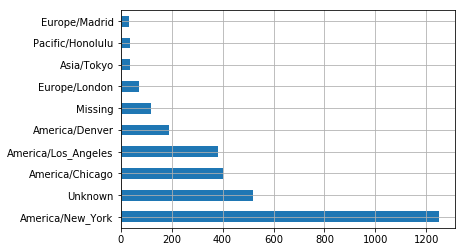

In [12]:
tz_counts[:10].plot(kind='barh', rot=0, grid=True)

# Analyzing the `a` Field

The `a` field contains information about the browser, device, or application used to perform the URL shortening:

In [13]:
for i in (1, 50, 51):
    print('%2d : ' %i, frame['a'][i])

 1 :  GoogleMaps/RochesterNY
50 :  Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
51 :  Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1


Parsing all of the interesting information in these “agent” strings may seem like a daunting task. Luckily, once you have mastered Python’s built-in string functions and **Regular Expression** capabilities, it is really not so bad. For example, we could split off the first token in the string (corresponding roughly to the browser capability) and make another summary of the user behavior:

In [14]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [15]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Now, suppose we want to decompose the top time zones into 'Windows' and 'nonWindows' users. As a simplification, let’s say that a user is on Windows if the string 'Windows' is in the agent string. Since some of the agents are missing, we’ll first exclude these from the data and then compute a value whether each row is Windows or not:

In [16]:
# Exclude the rows which misses the agent
cframe = frame[frame.a.notnull()]

# Determine whether a row contains Windows or not
operating_system = np.where(cframe['a'].str.contains('Windows'), 
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

Then, we can group the data by its time zone column and this new list of operating systems. The group counts, analogous to the `value_counts()` function above, can be computed using `size()` method. This result is then reshaped into a table with `unstack()` method:

In [17]:
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Finally, let’s select the top overall time zones. To do so, we first construct an indirect index array from the row counts in `agg_counts`:

In [18]:
# Construct an indirect indices
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

Then, we sort agg_counts according to the indirect indices and use `take()` method to select the rows in that order, and then slice off the last 10 rows:

In [19]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Then, as shown in the preceding code block, this can be plotted in a bar plot. We can make it a stacked bar plot by passing `stacked=True`. 

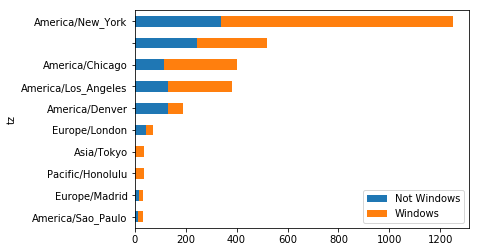

In [20]:
count_subset.plot(kind='barh', stacked=True)

This plot doesn’t make it easy to see the relative percentage of Windows users in the smaller groups, but the rows can easily be normalized to sum to 1 then plotted again:

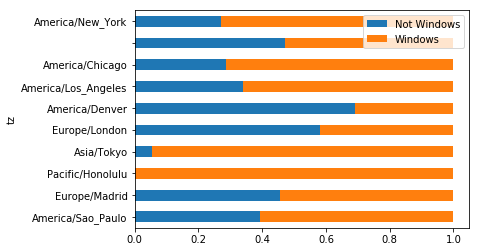

In [21]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)